## Load and plot data

shape of train x is (60000, 28, 28) and shape of train y is (60000,) 
shape of test x is (10000, 28, 28) and shape of testy is (10000,) 


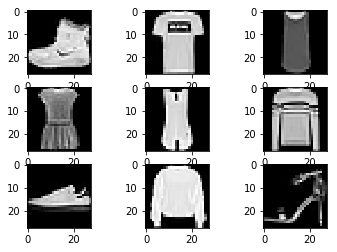

In [8]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt 

# Load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('shape of train x is {} and shape of train y is {} '.format(trainX.shape, trainy.shape))
print('shape of test x is {} and shape of testy is {} '.format(testX.shape, testy.shape))

# plot the images

for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

## Develop baseleine model

('accuracy is', 0.9074166666666666)


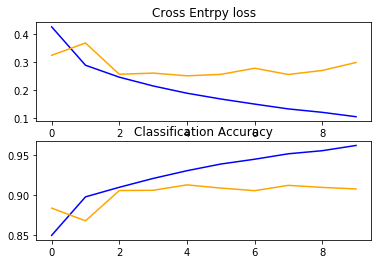

mean of score is 90.7416666667, standard deviation of score is 0.0 and length of score is 1


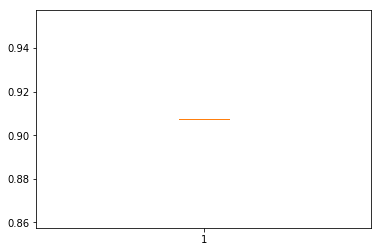

In [27]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.optimizers import SGD
from sklearn.model_selection import KFold
from matplotlib import pyplot
from numpy import mean, std


# First load data
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
    
    #reshape to have a single channel
    trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
    testX = testX.reshape(testX.shape[0], 28, 28, 1)
    
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# Second scale the pixels
def prep_pixels(train, test):
    # convert from integers to float
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    
    # normalise to range of 0-1
    train_norm = train_norm/255.0
    test_norm = test_norm/255.0
    return train_norm, test_norm

# Third define cnn model
def define_model():
    model = Sequential()
    # add convolutional layer with 32 filters of size 3x3 and relu activation 
    model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform',
                    input_shape=(28,28,1)))
    
    # add 2x2 maxpooling
    model.add(MaxPool2D((2,2)))
    
    # add flatten layer
    model.add(Flatten())
    
    # add dense layer of 100 connections with relu activation
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    
    # add output layer with softmax activation
    model.add(Dense(10, activation='softmax'))
    
    # intitialise optimiser which is stociastic gradient descent with learning rate and momentum
    opt = SGD(lr=0.01, momentum=0.9)
    
    # compile the model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Fourth Evaluate model using k-fold cross validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    
    # enumerate split
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('accuracy is', acc)
        
        # append scores
        scores.append(acc)
        histories.append(history)
        return scores, histories
    
# Fifth plot learning curve
def summarize_diagnostics(histories):
    # plot loss
    for i in range(len(histories)):
        pyplot.subplot(211)
        pyplot.title('Cross Entrpy loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        
        # plot accuracy
        pyplot.subplot(212)
        pyplot.title("Classification Accuracy")
        pyplot.plot(histories[i].history['acc'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_acc'], color='orange', label='test')
    pyplot.show()
    
# Sixth            summarise model performance
def summarize_performance(scores):
    # print details of the scores such as mean, standard deviation, length
    print('mean of score is {}, standard deviation of score is {} and length of score is {}'.
          format(mean(scores)*100, std(scores)*100, len(scores)))
    
    # plot box and whisker plots
    pyplot.boxplot(scores)
    pyplot.show()
    
def run_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    
    # evaluate model
    scores, histories = evaluate_model(trainX, trainY)
    
    # learning curves
    summarize_diagnostics(histories)
    
    # summarize performance
    summarize_performance(scores)
    
run_harness()


## Improve baseline model by adding padding

('accuracy is', 0.91075)


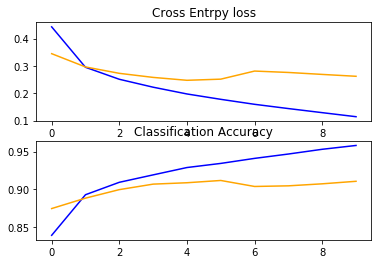

mean of score is 91.075, standard deviation of score is 0.0 and length of score is 1


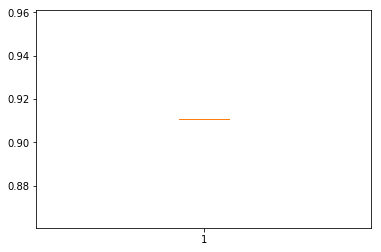

In [28]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.optimizers import SGD
from sklearn.model_selection import KFold
from matplotlib import pyplot
from numpy import mean, std


# First load data
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
    
    #reshape to have a single channel
    trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
    testX = testX.reshape(testX.shape[0], 28, 28, 1)
    
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# Second scale the pixels
def prep_pixels(train, test):
    # convert from integers to float
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    
    # normalise to range of 0-1
    train_norm = train_norm/255.0
    test_norm = test_norm/255.0
    return train_norm, test_norm

# Third define cnn model
def define_model():
    model = Sequential()
    # add convolutional layer with 32 filters of size 3x3 and relu activation 
    model.add(Conv2D(32, (3,3), padding='same', activation='relu', kernel_initializer='he_uniform',
                    input_shape=(28,28,1)))
    
    # add 2x2 maxpooling
    model.add(MaxPool2D((2,2)))
    
    # add flatten layer
    model.add(Flatten())
    
    # add dense layer of 100 connections with relu activation
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    
    # add output layer with softmax activation
    model.add(Dense(10, activation='softmax'))
    
    # intitialise optimiser which is stociastic gradient descent with learning rate and momentum
    opt = SGD(lr=0.01, momentum=0.9)
    
    # compile the model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Fourth Evaluate model using k-fold cross validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    
    # enumerate split
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('accuracy is', acc)
        
        # append scores
        scores.append(acc)
        histories.append(history)
        return scores, histories
    
# Fifth plot learning curve
def summarize_diagnostics(histories):
    # plot loss
    for i in range(len(histories)):
        pyplot.subplot(211)
        pyplot.title('Cross Entrpy loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        
        # plot accuracy
        pyplot.subplot(212)
        pyplot.title("Classification Accuracy")
        pyplot.plot(histories[i].history['acc'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_acc'], color='orange', label='test')
    pyplot.show()
    
# Sixth            summarise model performance
def summarize_performance(scores):
    # print details of the scores such as mean, standard deviation, length
    print('mean of score is {}, standard deviation of score is {} and length of score is {}'.
          format(mean(scores)*100, std(scores)*100, len(scores)))
    
    # plot box and whisker plots
    pyplot.boxplot(scores)
    pyplot.show()
    
def run_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    
    # evaluate model
    scores, histories = evaluate_model(trainX, trainY)
    
    # learning curves
    summarize_diagnostics(histories)
    
    # summarize performance
    summarize_performance(scores)
    
run_harness()

# Improve baseline model by increasing the number of filters

('accuracy is', 0.91225)


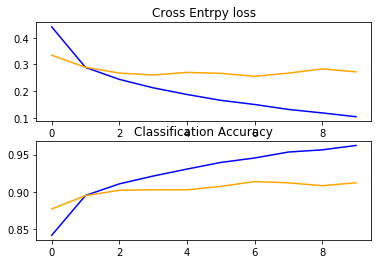

mean of score is 91.225, standard deviation of score is 0.0 and length of score is 1


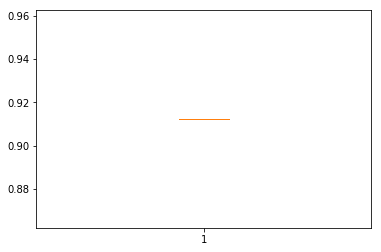

In [29]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.optimizers import SGD
from sklearn.model_selection import KFold
from matplotlib import pyplot
from numpy import mean, std


# First load data
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
    
    #reshape to have a single channel
    trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
    testX = testX.reshape(testX.shape[0], 28, 28, 1)
    
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# Second scale the pixels
def prep_pixels(train, test):
    # convert from integers to float
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    
    # normalise to range of 0-1
    train_norm = train_norm/255.0
    test_norm = test_norm/255.0
    return train_norm, test_norm

# Third define cnn model
def define_model():
    model = Sequential()
    # add convolutional layer with 32 filters of size 3x3 and relu activation 
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform',
                    input_shape=(28,28,1)))
    
    # add 2x2 maxpooling
    model.add(MaxPool2D((2,2)))
    
    # add flatten layer
    model.add(Flatten())
    
    # add dense layer of 100 connections with relu activation
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    
    # add output layer with softmax activation
    model.add(Dense(10, activation='softmax'))
    
    # intitialise optimiser which is stociastic gradient descent with learning rate and momentum
    opt = SGD(lr=0.01, momentum=0.9)
    
    # compile the model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Fourth Evaluate model using k-fold cross validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    
    # enumerate split
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('accuracy is', acc)
        
        # append scores
        scores.append(acc)
        histories.append(history)
        return scores, histories
    
# Fifth plot learning curve
def summarize_diagnostics(histories):
    # plot loss
    for i in range(len(histories)):
        pyplot.subplot(211)
        pyplot.title('Cross Entrpy loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        
        # plot accuracy
        pyplot.subplot(212)
        pyplot.title("Classification Accuracy")
        pyplot.plot(histories[i].history['acc'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_acc'], color='orange', label='test')
    pyplot.show()
    
# Sixth            summarise model performance
def summarize_performance(scores):
    # print details of the scores such as mean, standard deviation, length
    print('mean of score is {}, standard deviation of score is {} and length of score is {}'.
          format(mean(scores)*100, std(scores)*100, len(scores)))
    
    # plot box and whisker plots
    pyplot.boxplot(scores)
    pyplot.show()
    
def run_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    
    # evaluate model
    scores, histories = evaluate_model(trainX, trainY)
    
    # learning curves
    summarize_diagnostics(histories)
    
    # summarize performance
    summarize_performance(scores)
    
run_harness()

## Save final model

In [31]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.optimizers import SGD
from sklearn.model_selection import KFold
from matplotlib import pyplot
from numpy import mean, std


# First load data
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
    
    #reshape to have a single channel
    trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
    testX = testX.reshape(testX.shape[0], 28, 28, 1)
    
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY


# Second scale the pixels
def prep_pixels(train, test):
    # convert from integers to float
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    
    # normalise to range of 0-1
    train_norm = train_norm/255.0
    test_norm = test_norm/255.0
    return train_norm, test_norm

# Third define cnn model
def define_model():
    model = Sequential()
    # add convolutional layer with 32 filters of size 3x3 and relu activation 
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform',
                    input_shape=(28,28,1)))
    
    # add 2x2 maxpooling
    model.add(MaxPool2D((2,2)))
    
    # add flatten layer
    model.add(Flatten())
    
    # add dense layer of 100 connections with relu activation
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    
    # add output layer with softmax activation
    model.add(Dense(10, activation='softmax'))
    
    # intitialise optimiser which is stociastic gradient descent with learning rate and momentum
    opt = SGD(lr=0.01, momentum=0.9)
    
    # compile the model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def run_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    
    # define model
    model = define_model()
    
    # fit model
    model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
    
    # save model
    model.save('final_model.h5')
    
run_harness()


## Evaluate final model

In [33]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.optimizers import SGD
from sklearn.model_selection import KFold
from matplotlib import pyplot
from numpy import mean, std
from keras.models import load_model


# First load data
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
    
    #reshape to have a single channel
    trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
    testX = testX.reshape(testX.shape[0], 28, 28, 1)
    
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY


# Second scale the pixels
def prep_pixels(train, test):
    # convert from integers to float
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    
    # normalise to range of 0-1
    train_norm = train_norm/255.0
    test_norm = test_norm/255.0
    return train_norm, test_norm

# Third define cnn model
def define_model():
    model = Sequential()
    # add convolutional layer with 32 filters of size 3x3 and relu activation 
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform',
                    input_shape=(28,28,1)))
    
    # add 2x2 maxpooling
    model.add(MaxPool2D((2,2)))
    
    # add flatten layer
    model.add(Flatten())
    
    # add dense layer of 100 connections with relu activation
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    
    # add output layer with softmax activation
    model.add(Dense(10, activation='softmax'))
    
    # intitialise optimiser which is stociastic gradient descent with learning rate and momentum
    opt = SGD(lr=0.01, momentum=0.9)
    
    # compile the model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def run_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    
    # define model
    model = load_model('final_model.h5')
    
    # evaluate model on test data
    
    _, acc = model.evaluate(testX, testY, verbose=0)
    
    print('accuracy is {}'.format(acc * 100))
    
run_harness()


accuracy is 91.36


## Make Predictions

In [37]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model


# create function to load image
def load_image(filename):
    # convert the image to grayscale and size to 28x28
    image = load_img(filename, grayscale=True, target_size=(28, 28))
    
    # convert image to array
    image = img_to_array(image)
    
    # reshape the array
    image = image.reshape(1, 28, 28, 1)
    
    # convert the array to float
    image = image.astype('float32')
    
    # normalise the pixel
    image = image/255.0
    
    return image

# load image and predict
def run_example():
    image = load_image('sample_image.png')
    
    # load the saved model
    model = load_model('final_model.h5')
    
    # predict class
    result = model.predict_classes(image)
    
    print(result)
    
run_example()


/home/aifi/anaconda3/lib/python2.7/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


[2]
